In [7]:
import keras
import numpy
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.datasets import mnist
from keras.optimizers import RMSprop
from keras.callbacks import Callback, CSVLogger
#import tensorflow as tf
#config = tf.ConfigProto()
#config.gpu_options.allow_growth = True
#tf.keras.backend.set_session(tf.Session(config=config))

(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0],784)/255
x_test = x_test.reshape(x_test.shape[0],784)/255

y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [8]:
#######Please set as you like#########
batch_size = 128
epochs = 10
dropout = 0.2
learning_rate = 0.001

loss = 'categorical_crossentropy'
optimizer=RMSprop(lr = learning_rate)

csv_create_path = './keras_trainlog.csv'
loss_figure_save_path = './keras_loss.jpg'
acc_figure_save_path = './keras_acc.jpg'
######################################

In [17]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(dropout))
model.add(Dense(512, activation='relu'))
model.add(Dropout(dropout))
model.add(Dense(10, activation='softmax'))

model.compile(loss=loss,
              optimizer=optimizer,
              metrics=['accuracy'])

model.summary()

csv_logger = CSVLogger(csv_create_path)

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test),
                    callbacks=[csv_logger])

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_10 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 16s 274us/step - loss: 0.246

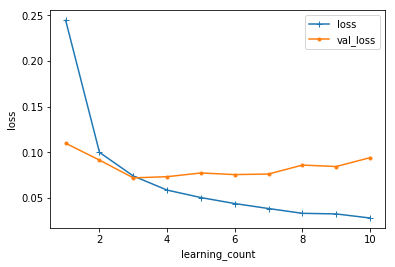

In [11]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]

learning_count = len(loss)+1

plt.plot(range(1,learning_count),loss,marker = "+",label = "loss")
plt.plot(range(1,learning_count),val_loss,marker = ".",label = "val_loss")
plt.legend(loc = "best",fontsize = 10)
plt.xlabel("learning_count")
plt.ylabel("loss")
plt.savefig(loss_figure_save_path)

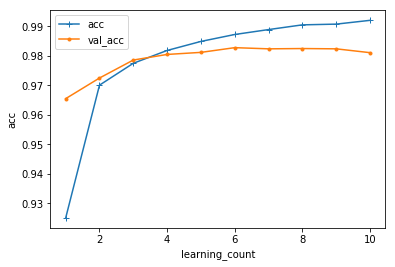

In [12]:
loss = history.history["acc"]
val_loss = history.history["val_acc"]

learning_count = len(loss)+1

plt.plot(range(1,learning_count),loss,marker = "+",label = "acc")
plt.plot(range(1,learning_count),val_loss,marker = ".",label = "val_acc")
plt.legend(loc = "best",fontsize = 10)
plt.xlabel("learning_count")
plt.ylabel("acc")
plt.savefig(acc_figure_save_path)